## Part 2: Analysis of replicate simulations of dynein light chain ##
In this section of the workshop we move from a comparative analysis of MD trajectories of two different proteins, to the comparative analysis of multple independent simulations of the same protein.

You have ben provided with eight trajectory files (Amber netcdf format) from eight independent 25 nanosecond simulations of the dyenin light chain LC8 (PDB code 1rhw) - a small protein of 89 amino acids. In this case the trajectory files contain all protein atoms, not just the C-alpha atoms, and are sampled every 10 ps (2500 frames per trajectory). You will examine convergence and sampling in this ensemble. 

### Part 2A: RMSD Analysis
To begin with you can generate RMSD plots for each of the eight trajectories.

Run the code in the following cell:

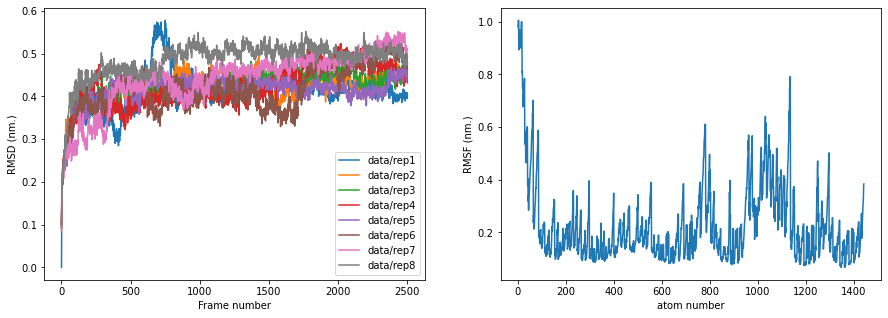

In [1]:
from utilities import *
import numpy as np
import mdtraj as mdt
from mdplus import pca
import matplotlib.pyplot as plt
%matplotlib inline

#=====================
# You may play with the variables in this section later on in the tutorial:
n_reps = 8
#n_reps = 6
atom_selection = 'all'
#atom_selection = 'name CA'
#atom_selection = 'name CA and resid 7 to 89'
first_frame = 1
#first_frame = 100
last_frame = 2500
#======================

trajectory_files = ['data/rep{}/1rhw.md1.nc'.format(i + 1) for i in range(n_reps)]
replicate_ids = ['data/rep{}'.format(i + 1) for i in range(n_reps)]
topology_file = 'data/1rhw_prot.pdb'
trajlist = []
for tf in trajectory_files:
    traj = mdt.load(tf, top=topology_file)
    sel = traj.topology.select(atom_selection)
    trajlist.append(mdt.Trajectory(traj.xyz[first_frame - 1:last_frame, sel], topology=traj.topology.subset(sel)))
dynein_data = trajlist[0].join(trajlist[1:])
dynein_data.superpose(dynein_data[0])

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_rmsd(dynein_data, replicate_ids)

plt.subplot(122)
plot_rmsf(dynein_data)

The RMSD plots for each replicate should appear broadly similar, rising quickly at the start but then more-or-less plateauing. The RMSF plot on the right shows which atoms are most mobile.

These plots calculated the RMSDs over all atoms - try repeating the calculation, but just including C-alpha atoms, as you did for the neuraminidase example before. To do this, just uncomment (remove the '#' symbol from) the line in the cell above that reads `#atom_selection = 'name CA'` and comment out (add a '#' to the start of) the line above that currently reads `atom_selection = 'all'`, then press shift-enter again to re-run the calculation. 

#### Does much change? Do the curves plateau at a significantly lower RMSD?


The RMSF plot should make you think that it might be better to leave out the first few (maybe 6?) amino acids as well. By adding/removing '#'s in the cell above, set the value of `atom_selection` to be `'resid 7 to 89'`, and recalculate.

#### Does that improve things?


We might guess that the simulations include a preliminary relaxation stage, when the RMSD rises quickly. What happens if you discard the first, say, 100 snapshots from each trajectory file? To do this uncomment the line above that reads `#first_frame = 100`, comment out the line above (that reads `first_frame  = 1`) and recalculate. 

#### Does that help?


#### Experiment with leaving out more of the initial simulation data.


### Part 2B: PCA Analysis

Let's now see if PCA reveals anything more. The code below does just the same as for the neuraminidase example you studied earlier:

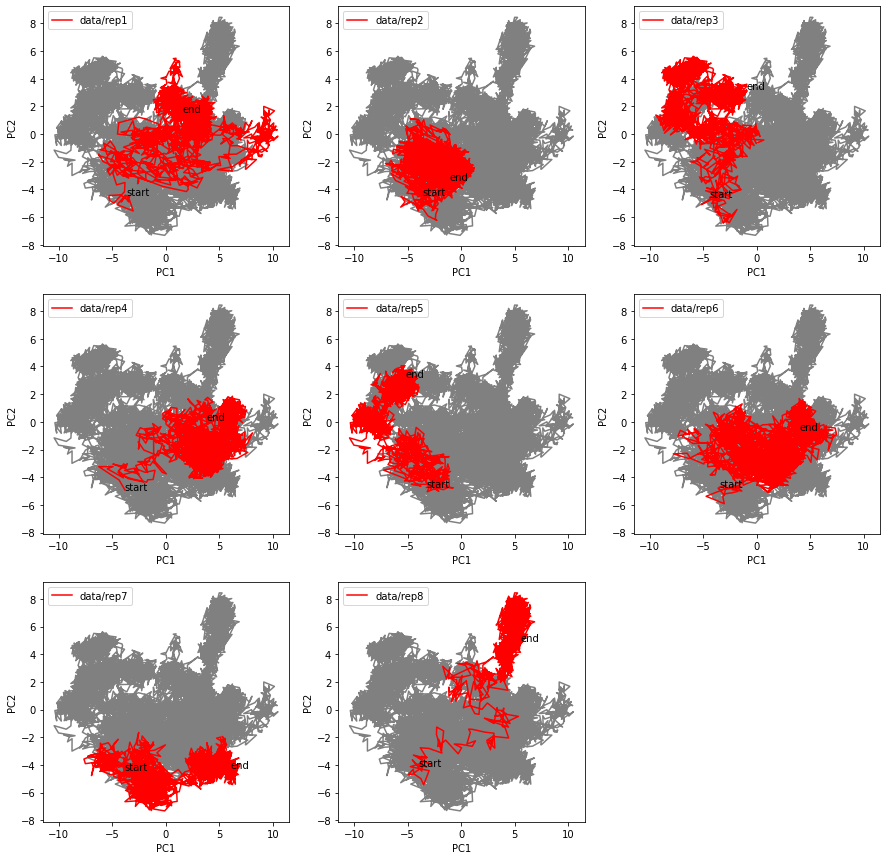

In [2]:
p = pca.PCA()
scores = p.fit_transform(dynein_data.xyz)

plt.figure(figsize=(15,15))
for dataset in range(8):
    plt.subplot(3, 3, dataset + 1)
    plot_pca(scores, replicate_ids, highlight=dataset)


Each panel shows the path of a single replicate trajectory, over the background of the rest. What do you see about the behaviour of individual replicates? Are there "outliers"? You may be suspicious about replicate 8. If you have time, you could go back to the start of this section, and by changing the value of `n_reps`, repeat the analysis without it.

## Summary

Hopefully this part of the workshop has provided you with some tools that you can apply to your own simulation studies. You will have seen the limitations of conventional RMSD analysis for looking at equilibration and convergence, and how PCA can help. You will see how data analysis is frequently an interactive, iterative, process. It has probably also made it very obvious that getting a well-equilibrated, well-sampled dataset from MD simulation from which reliable and reproducible conclusions can be drawn is not a trivial issue!